In [4]:
import numpy as np
import requests
import pandas as pd
import os
import torch
import sys
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if not IN_COLAB:
    os.chdir("..")
%load_ext autoreload
%autoreload 2

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.datasets import make_classification

# !{sys.executable} -m pip install cartopy.crs
from sklearn.model_selection import train_test_split


# Optional
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.stats import ttest_rel


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig



# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
resp = requests.get("https://www.youtube.com")
dir(resp)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [3]:
resp.status_code

200

In [4]:
print(resp.text[:1000])

<!DOCTYPE html><html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="en" system-icons typography typography-spacing><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><script nonce="HGWzaL8Fp10/y1x+pgRSxg">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else for(var k in a[0])ytcfg.d()[k]=a[0][k]}};
window.ytcfg.set('EMERGENCY_BASE_URL', '\/error_204?t\x3djserror\x26level\x3dERROR\x26client.name\x3d1\x26client.version\x3d2.20220406.09.00');</script><script nonce="HGWzaL8Fp10/y1x+pgRSxg">(function(){window.yterr=window.yterr||true;window.unhandledErrorMessages={};window.unhandledErrorCount=0;
window.onerror=function(msg,url,line,columnNumber,error){var err;if(error)err=error;else{err=new Error;err.stack="";err.message=msg;err.fileName=url;err.lineNumber=line;if(!isNaN(columnNumber))err["columnNumber"

In [5]:
resp = requests.get("https://www.example.com/pagethatdoesnotexist")
resp.status_code

404

In [17]:
# collegeinfo = None
base_url = "https://api.data.gov/ed/collegescorecard/v1/"
dataset = "schools.json?"
filter_params = "latest.student.size__range=1000.."
count = 22
fields = ["id",
          "school.name",
          "2014.student.size",
          "2019.student.size",
          "latest.student.size",
          "location.lat",
          "location.lon",
          "latest.admissions.admission_rate.overall",
          "latest.admissions.sat_scores.average.overall",
          "latest.cost.attendance_academic_year",
          "latest.cost.tuition.in_state",
          "latest.cost.tuition.out_of_state",
          "latest.school.faculty_salary",
          "latest.aid.pell_grant_rate",
          "latest.aid.federal_loan_rate",
          "latest.student.share_first.time_full.time",
          "latest.student.retention_rate.four_year.full_time",
          "latest.repayment.1_yr_repayment.completers_rate",
          "latest.aid.median_debt.completers.overall",
          "latest.aid.median_debt.noncompleters",
          "latest.student.demographics.age_entry",
          "latest.student.demographics.men",
          "latest.student.demographics.women",
          "latest.earnings.10_yrs_after_entry.not_working_not_enrolled.overall",
          "latest.earnings.10_yrs_after_entry.working_not_enrolled.overall",
          "latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings",
          "latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev",
          "latest.student.retention_rate.four_year.full_time_pooled",
          "latest.academics.program_reporter.programs_offered",
          "latest.cost.roomboard.oncampus",
          "latest.earnings.10_yrs_after_entry.gt_threshold",
          "latest.admissions.sat_scores.midpoint.math",
          "latest.admissions.act_scores.midpoint.math"]
api_key = "&api_key=N32GQhGcYfE5dAO7Sqeb62hN9fvnmqlVkeZN0kKD"          # Your API key goes here.

college_info = pd.DataFrame()

while True:
    options = "&per_page=100&page=" + str(count)
    count += 1
    
    request_url = base_url + dataset + filter_params + \
              "&fields=" + ",".join(fields) + options + api_key
    resp = requests.get(request_url)
    # Raises an HTTPError unless status_code==200 (OK)
    resp.raise_for_status()
    college_info = college_info.append(pd.DataFrame(resp.json()['results']).set_index('id'))
    if count > 22:
        break
# with open("api_key.txt") as f:
#     api_key = "&api_key=" + f.readlines()[0]
# api_key


print(request_url)

https://api.data.gov/ed/collegescorecard/v1/schools.json?latest.student.size__range=1000..&fields=id,school.name,2014.student.size,2019.student.size,latest.student.size,location.lat,location.lon,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.cost.attendance_academic_year,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.school.faculty_salary,latest.aid.pell_grant_rate,latest.aid.federal_loan_rate,latest.student.share_first.time_full.time,latest.student.retention_rate.four_year.full_time,latest.repayment.1_yr_repayment.completers_rate,latest.aid.median_debt.completers.overall,latest.aid.median_debt.noncompleters,latest.student.demographics.age_entry,latest.student.demographics.men,latest.student.demographics.women,latest.earnings.10_yrs_after_entry.not_working_not_enrolled.overall,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall,latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,latest.ear

In [18]:
resp = requests.get(request_url)
# Raises an HTTPError unless status_code==200 (OK)
resp.raise_for_status()

In [19]:
resp.json()

{'metadata': {'page': 22, 'total': 2268, 'per_page': 100},
 'results': [{'latest.student.size': 4533,
   'latest.admissions.admission_rate.overall': None,
   'latest.admissions.sat_scores.average.overall': None,
   'latest.cost.tuition.in_state': 3920,
   'latest.cost.tuition.out_of_state': 3920,
   'latest.school.faculty_salary': 5040,
   'latest.aid.pell_grant_rate': 0.0006,
   'latest.aid.federal_loan_rate': 0.0077,
   'latest.student.share_first.time_full.time': 0.4771,
   'latest.student.retention_rate.four_year.full_time': 0.8,
   'latest.repayment.1_yr_repayment.completers_rate': None,
   'latest.aid.median_debt.completers.overall': 12135,
   'latest.aid.median_debt.noncompleters': 6221,
   'latest.student.demographics.age_entry': 34,
   'latest.student.demographics.men': 0.1456,
   'latest.student.demographics.women': 0.8544,
   'latest.earnings.10_yrs_after_entry.not_working_not_enrolled.overall': None,
   'latest.earnings.10_yrs_after_entry.working_not_enrolled.overall': None

In [ ]:
# college_info = pd.DataFrame(resp.json()['results']).set_index('id')
first13 = first13.append(college_info)
first13

In [ ]:
originalDataset = college_info
college_info

In [ ]:
# college_info.to_excel("college_info.xlsx")
college_info.corr().to_excel("college_info correlations.xlsx")

In [20]:
college_info.describe()

,latest.student.size,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.school.faculty_salary,latest.aid.pell_grant_rate,latest.aid.federal_loan_rate,latest.student.share_first.time_full.time,latest.student.retention_rate.four_year.full_time,...,latest.student.retention_rate.four_year.full_time_pooled,latest.academics.program_reporter.programs_offered,latest.cost.roomboard.oncampus,latest.earnings.10_yrs_after_entry.gt_threshold,latest.admissions.sat_scores.midpoint.math,latest.admissions.act_scores.midpoint.math,2019.student.size,2014.student.size,location.lat,location.lon
count,68.000000,22.000000,12.000000,58.000000,58.000000,63.000000,68.000000,68.000000,66.000000,38.000000,...,39.000000,8.000000,14.000000,47.00000,12.000000,11.000000,68.000000,49.000000,68.000000,68.000000
mean,6132.588235,0.718950,1095.416667,10900.965517,14496.620690,6885.063492,0.449097,0.467621,0.371497,0.612947,...,0.622182,16.875000,10045.714286,0.68173,537.083333,21.636364,6132.588235,6890.979592,35.439940,-94.361478
std,10208.329770,0.248131,110.058215,8101.257637,7742.740008,2171.353605,0.182577,0.285163,0.321014,0.220695,...,0.206300,24.374679,1929.418184,0.14849,57.975635,3.170890,10208.329770,21565.718644,4.422442,16.061549
min,1002.000000,0.285700,899.000000,1124.000000,3920.000000,2531.000000,0.000600,0.000000,0.001300,0.166700,...,0.181800,2.000000,7500.000000,0.40430,420.000000,18.000000,1002.000000,46.000000,25.810710,-122.307618
25%,1555.000000,0.476250,1042.500000,4774.000000,9387.500000,5109.500000,0.306825,0.284475,0.072950,0.443200,...,0.470600,3.750000,8355.000000,0.57010,512.500000,19.000000,1555.000000,1055.000000,32.631026,-111.883491
50%,2884.000000,0.787050,1088.000000,9290.000000,13515.000000,7099.000000,0.470650,0.471550,0.313250,0.650350,...,0.638900,7.500000,10136.500000,0.68420,535.000000,22.000000,2884.000000,2063.000000,34.066170,-89.862062
75%,6733.000000,0.956225,1131.250000,14337.250000,17942.000000,8105.000000,0.562750,0.742725,0.567350,0.748225,...,0.776750,16.500000,11388.250000,0.80125,557.500000,23.000000,6733.000000,6506.000000,39.676696,-82.252154
max,68833.000000,1.000000,1304.000000,35284.000000,37296.000000,13692.000000,0.814800,0.927400,1.000000,1.000000,...,1.000000,75.000000,13183.000000,0.90630,645.000000,28.000000,68833.000000,151558.000000,44.829002,-68.791476


In [21]:
college_info.corr()

,latest.student.size,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.school.faculty_salary,latest.aid.pell_grant_rate,latest.aid.federal_loan_rate,latest.student.share_first.time_full.time,latest.student.retention_rate.four_year.full_time,...,latest.student.retention_rate.four_year.full_time_pooled,latest.academics.program_reporter.programs_offered,latest.cost.roomboard.oncampus,latest.earnings.10_yrs_after_entry.gt_threshold,latest.admissions.sat_scores.midpoint.math,latest.admissions.act_scores.midpoint.math,2019.student.size,2014.student.size,location.lat,location.lon
latest.student.size,1.000000,0.019524,0.022377,-0.147816,-0.077188,0.035012,-0.046840,0.004234,-0.089927,0.017426,...,-0.027865,-0.269156,0.588427,-0.068302,0.031424,-0.138673,1.000000,0.901746,0.010921,-0.130968
latest.admissions.admission_rate.overall,0.019524,1.000000,-0.206050,0.230611,0.082755,0.093140,0.040544,-0.000387,-0.147134,0.007165,...,0.071691,1.000000,0.205549,-0.189074,-0.178990,-0.341201,0.019524,0.426794,0.108338,-0.110901
latest.admissions.sat_scores.average.overall,0.022377,-0.206050,1.000000,-0.282016,-0.203551,0.090496,-0.708668,-0.518918,0.413476,0.157643,...,0.481718,NaN,0.598672,0.788464,0.992619,0.948699,0.022377,-0.070891,-0.282661,0.403010
latest.cost.tuition.in_state,-0.147816,0.230611,-0.282016,1.000000,0.793606,-0.027039,0.340614,0.647076,-0.134926,0.083967,...,0.038489,NaN,0.185681,0.609025,-0.230921,-0.182618,-0.147816,-0.089504,0.056152,-0.152200
latest.cost.tuition.out_of_state,-0.077188,0.082755,-0.203551,0.793606,1.000000,0.209719,0.182913,0.428672,0.092299,0.353948,...,0.309598,NaN,0.204611,0.689587,-0.213039,0.014056,-0.077188,-0.145430,-0.010457,-0.094896
latest.school.faculty_salary,0.035012,0.093140,0.090496,-0.027039,0.209719,1.000000,-0.077353,-0.015304,-0.101370,0.230712,...,0.198981,0.174358,0.535415,0.492647,0.100504,0.363167,0.035012,0.064101,0.008041,-0.112795
latest.aid.pell_grant_rate,-0.046840,0.040544,-0.708668,0.340614,0.182913,-0.077353,1.000000,0.771984,-0.069209,-0.476565,...,-0.462958,-0.734667,-0.067910,-0.079546,-0.713173,-0.437974,-0.046840,-0.057899,-0.066227,0.241590
latest.aid.federal_loan_rate,0.004234,-0.000387,-0.518918,0.647076,0.428672,-0.015304,0.771984,1.000000,-0.219030,-0.323127,...,-0.362532,-0.764474,0.318478,0.437932,-0.454043,-0.595093,0.004234,-0.000568,0.002912,0.114619
latest.student.share_first.time_full.time,-0.089927,-0.147134,0.413476,-0.134926,0.092299,-0.101370,-0.069209,-0.219030,1.000000,0.200027,...,0.223398,-0.363577,-0.288855,-0.210352,0.425402,0.584642,-0.089927,-0.073583,0.121508,0.105474
latest.student.retention_rate.four_year.full_time,0.017426,0.007165,0.157643,0.083967,0.353948,0.230712,-0.476565,-0.323127,0.200027,1.000000,...,0.955006,NaN,0.546761,0.387997,0.152474,0.290049,0.017426,-0.168479,-0.050623,-0.262163


NameError: name 'matrix' is not defined

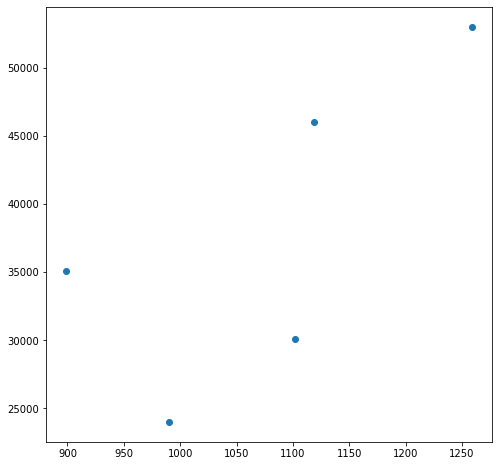

In [30]:
plt.figure(figsize=(8, 8))
# plt.scatter(college_info['latest.admissions.act_scores.midpoint.math'],
#             college_info['latest.admissions.sat_scores.midpoint.math'])
plt.scatter(college_info['latest.admissions.sat_scores.average.overall'],
            college_info['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev'])
X = matrix[:,0]
y = matrix[:,1]


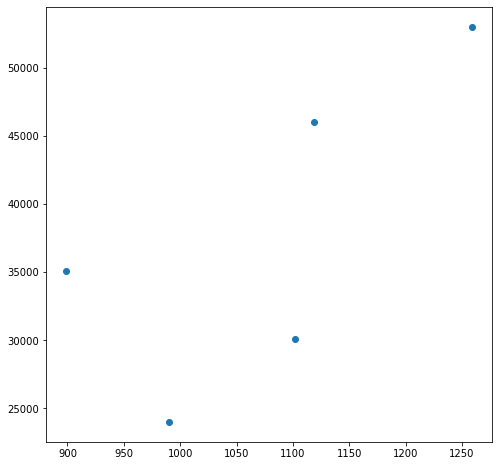

In [31]:
plt.figure(figsize=(8, 8))
# plt.scatter(college_info['latest.admissions.act_scores.midpoint.math'],
#             college_info['latest.admissions.sat_scores.midpoint.math'])
plt.scatter(college_info['latest.admissions.sat_scores.average.overall'],
            college_info['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev'])

In [32]:
has_size_info = college_info.dropna(subset=['2014.student.size', '2019.student.size']).index
ttest_rel(college_info['2014.student.size'].loc[has_size_info],
          college_info['2019.student.size'].loc[has_size_info])

Ttest_relResult(statistic=0.49449647226331345, pvalue=0.6232113379637758)

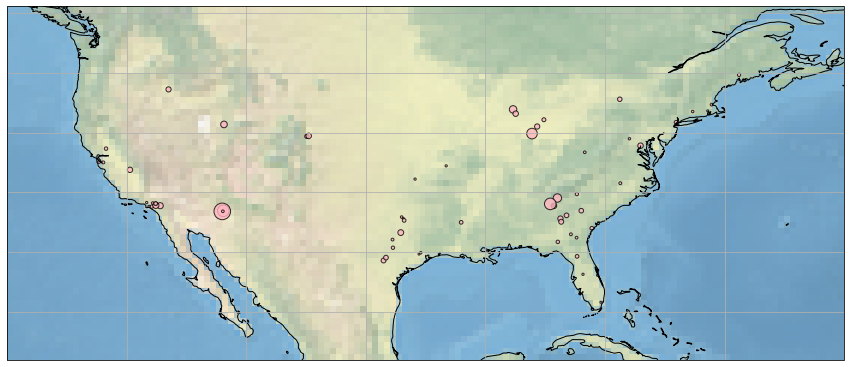

In [33]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 21, 45])
ax.stock_img()
ax.gridlines()
ax.coastlines(resolution='50m')
ax.scatter(college_info['location.lon'],
           college_info['location.lat'],
           color="lightpink",
           s=4e-3*college_info['2019.student.size'],
           alpha=0.8,
           ec="black")

In [25]:
randomizedDataset = originalDataset.sample(n=2000)
randomizedDataset
imputer = KNNImputer(n_neighbors=5)


inputs = randomizedDataset.drop(["latest.student.retention_rate.four_year.full_time",
                                 "latest.repayment.1_yr_repayment.completers_rate",
                                 "latest.aid.median_debt.completers.overall",
                                 "latest.aid.median_debt.noncompleters",
                                 "latest.earnings.10_yrs_after_entry.not_working_not_enrolled.overall",
                                 "latest.earnings.10_yrs_after_entry.working_not_enrolled.overall",
                                 "latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings",
                                 "latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev",
                                 "latest.student.retention_rate.four_year.full_time_pooled",
                                 "latest.earnings.10_yrs_after_entry.gt_threshold",
                                 "school.name"], axis=1)

outputs = randomizedDataset.drop(["latest.student.size",
                                  "latest.admissions.admission_rate.overall",
                                  "latest.admissions.sat_scores.average.overall",
                                  "latest.cost.tuition.in_state",
                                  "latest.cost.tuition.out_of_state",
                                  "latest.school.faculty_salary",
                                  "latest.aid.pell_grant_rate",
                                  "latest.aid.federal_loan_rate",
                                  "latest.student.share_first.time_full.time",
                                  "latest.student.demographics.age_entry",
                                  "latest.student.demographics.men",
                                  "latest.student.demographics.women",
                                  "latest.academics.program_reporter.programs_offered",
                                  "latest.cost.roomboard.oncampus",
                                  "latest.admissions.sat_scores.midpoint.math",
                                  "latest.admissions.act_scores.midpoint.math",
                                  "location.lat",
                                  "location.lon",
                                  "2019.student.size",
                                  "2014.student.size",
                                  "school.name"], axis=1)

# Xin = randomizedDataset[:1000]
# Y = randomizedDataset[1000:]

col = outputs.columns.get_loc("latest.student.retention_rate.four_year.full_time")
imputer = KNNImputer(n_neighbors=5)
imputedInputs = imputer.fit_transform(inputs)
imputedOutputs = imputer.fit_transform(outputs)


input_train, input_test, output_train, output_test = train_test_split(
             imputedInputs, imputedOutputs[:,col], test_size = 0.2, random_state=42)


imputedOutputs[:,col]


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(input_train, output_train)


# clf = LogisticRegression()
# clf.fit(input_train, output_train)



# print(knn.predict(input_test))


NameError: name 'originalDataset' is not defined

In [ ]:
irisData.data

In [ ]:
np.asarray(randomizedDataset.values)

In [ ]:
randomizedDataset["latest.student.size"]

In [ ]:
randomizedDataset.columns

In [ ]:
imputedOutputs["latest.student.retention_rate.four_year.full_time"]

In [ ]:
testRandom = randomizedDataset.drop("school.name",axis=1)

In [ ]:
textRandom = testRandom.apply(lambda x: x.fillna(x.median()),axis=0)
textRandom.isnull().sum()

In [ ]:
testRandom.info()

In [ ]:
randomizedDataset.head()

In [ ]:
class SOM:
 
    # Function here computes the winning vector
    # by Euclidean distance
    def winner(self, weights, sample):
 
        D0 = 0
        D1 = 0
 
        for i in range(len(sample)):
 
            D0 = D0 + math.pow((sample[i] - weights[0][i]), 2)
            D1 = D1 + math.pow((sample[i] - weights[1][i]), 2)
 
            if D0 > D1:
                return 0
            else:
                return 1
 
    # Function here updates the winning vector
    def update(self, weights, sample, J, alpha):
 
        for i in range(len(weights)):
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])
 
        return weights
 
# Driver code

imputedRandom = imputer.fit_transform(randomizedDataset.drop("school.name", axis=1))


# T = [[1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]
# imputedRandom
    # Training Examples ( m, n )
T = randomizedDataset

m, n = len(T), len(T[0])

# weight initialization ( n, C )
weights = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]

# training
ob = SOM()

epochs = 3
alpha = 0.5

for i in range(epochs):
    for j in range(m):

        # training sample
        sample = T[j]

        # Compute winner vector
        J = ob.winner(weights, sample)

        # Update winning vector
        weights = ob.update(weights, sample, J, alpha)

# classify test sample
s = [0, 0, 0, 1]
J = ob.winner(weights, s)

print("Test Sample s belongs to Cluster : ", J)
print("Trained weights : ", weights)

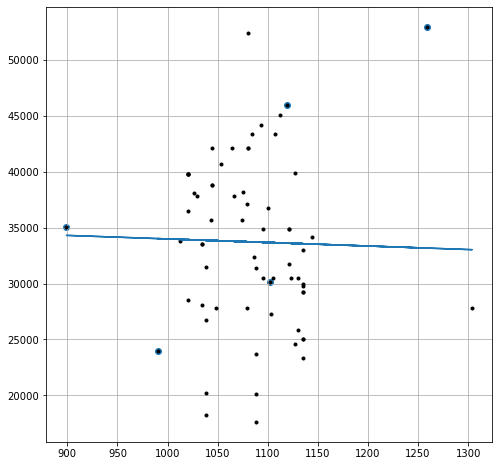

In [27]:
imputedInfo = imputer.fit_transform(college_info.drop("school.name", axis=1))
plt.figure(figsize=(8, 8))
# plt.scatter(college_info['latest.admissions.act_scores.midpoint.math'],
#             college_info['latest.admissions.sat_scores.midpoint.math'])
plt.scatter(college_info['latest.admissions.sat_scores.average.overall'],
            college_info['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev'])
# X = imputer.fit_transform(college_info['latest.admissions.sat_scores.average.overall'])
# y = imputer.fit_transform(college_info['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev'])

col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()


In [ ]:
college_info.columns

In [ ]:
for x in college_info.columns

In [ ]:
np.set_printoptions(threshold=np.inf)
print(college_info.corr())

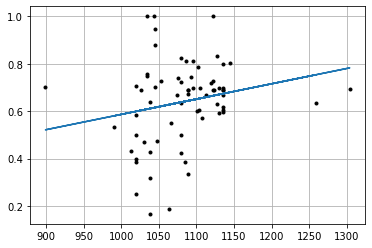

In [28]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.student.retention_rate.four_year.full_time")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

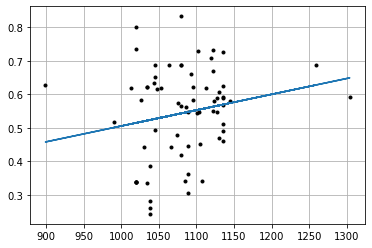

In [29]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.repayment.1_yr_repayment.completers_rate")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()



In [ ]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.cost.tuition.in_state")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.cost.tuition.out_of_state")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.school.faculty_salary")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.admissions.sat_scores.average.overall")
col2 = college_info.columns.get_loc("latest.earnings.10_yrs_after_entry.gt_threshold")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
print(college_info.corr())

In [ ]:
col1 = college_info.columns.get_loc("latest.school.faculty_salary")
col2 = college_info.columns.get_loc("latest.student.retention_rate.four_year.full_time")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.school.faculty_salary")
col2 = college_info.columns.get_loc("latest.repayment.1_yr_repayment.completers_rate")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.school.faculty_salary")
col2 = college_info.columns.get_loc("latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.student.share_first.time_full.time")
col2 = college_info.columns.get_loc("latest.student.retention_rate.four_year.full_time")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.student.share_first.time_full.time")
col2 = college_info.columns.get_loc("latest.repayment.1_yr_repayment.completers_rate")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
print(college_info.corr())

In [ ]:
col1 = college_info.columns.get_loc("latest.student.share_first.time_full.time")
col2 = college_info.columns.get_loc("latest.student.retention_rate.four_year.full_time")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.cost.roomboard.oncampus")
col2 = college_info.columns.get_loc("latest.student.retention_rate.four_year.full_time")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.cost.roomboard.oncampus")
col2 = college_info.columns.get_loc("latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.cost.roomboard.oncampus")
col2 = college_info.columns.get_loc("")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
col1 = college_info.columns.get_loc("latest.cost.roomboard.oncampus")
col2 = college_info.columns.get_loc("")
X = imputedInfo[:,col1]
Y = imputedInfo[:,col2]
m, b = np.polyfit(X,Y,1)

plt.grid(True)
plt.plot(X, Y, 'k.')
plt.plot(X, m*X + b, '-')
plt.show()

In [ ]:
college_info["id"]

In [ ]:
college_info.corr()